# 01. Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import Dataframe

In [2]:
#Set file path
path = r'C:\Users\Campa\Data Projects\Instacart Basket Project'

In [3]:
#Import Cust_ords_prods_merged.pkl
cust_ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Cust_Ords_Prods_Merged.pkl'))

In [ ]:
#Checking DF shape
cust_ords_prods.shape

In [ ]:
cust_ords_prods.head()

# 03. Creating a Bar Chart

In [ ]:
#Creating a bara chart of orders by day of the week
bar_orders_dow = cust_ords_prods['order_day_of_week'].value_counts().plot.bar(color = 'green')

In [ ]:
#exporting bar chart
bar_orders_dow.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

# 04. Creating a Historgram of Product Prices

In [ ]:
#creating histogram of prices with 25 bins
cust_ords_prods['prices'].plot.hist(bins = 25)

In [ ]:
#checking prices stats
cust_ords_prods['prices'].describe()

In [ ]:
cust_ords_prods['prices'].mean()

In [ ]:
cust_ords_prods['prices'].median()

In [ ]:
cust_ords_prods['prices'].max()

In [ ]:
# Creating scatter plot of prices to determine outliers
sns.scatterplot(x = 'prices', y = 'prices', data = cust_ords_prods)

In [ ]:
#checking for products with prices over $100
cust_ords_prods.loc[cust_ords_prods['prices'] > 100]

In [ ]:
#replacing outlier values with NaNs
cust_ords_prods.loc[cust_ords_prods['prices'] > 100, 'prices'] = np.nan

In [ ]:
cust_ords_prods['prices'].max()

In [ ]:
#creating histogram of prices with 25 bins
hist = cust_ords_prods['prices'].plot.hist(bins = 25)

In [ ]:
#creating histogram of prices with 70 bins
hist_2 = cust_ords_prods['prices'].plot.hist(bins=70)

# 05. Creating data sample for line chart

In [ ]:
#creating seed for sample
dev = np.random.rand(len(cust_ords_prods)) <= 0.7

In [ ]:
dev

In [ ]:
#splitting data samples, 70% in Big 30 % in small
big = cust_ords_prods[dev]
small = cust_ords_prods[~dev]

In [ ]:
#checking data sample sizes
len(cust_ords_prods)

In [ ]:
len(big) + len(small)

In [ ]:
#creating subest of sample for easier visualization 
df = small[['order_day_of_week', 'prices']]

In [ ]:
# creating line chart of prices over days of week
line = sns.lineplot(data = df, x = 'order_day_of_week', y = 'prices')

All of these visualizations were exported as part of my exercise notebook.

# 06. Create a Histogram of Order_hour_of_day

In [ ]:
hour_hist_1 = cust_ords_prods['order_hour_of_day'].plot.hist(bins = 24)

In [ ]:
hour_hist_2 = cust_ords_prods['order_hour_of_day'].plot.hist(bins = 24)

The majority of orders come in between mid morning and mid afternoon with the true pea happening between approximately 10am and 4 pm.

# 07. Creating a Bar Chart of Loyalty Flags

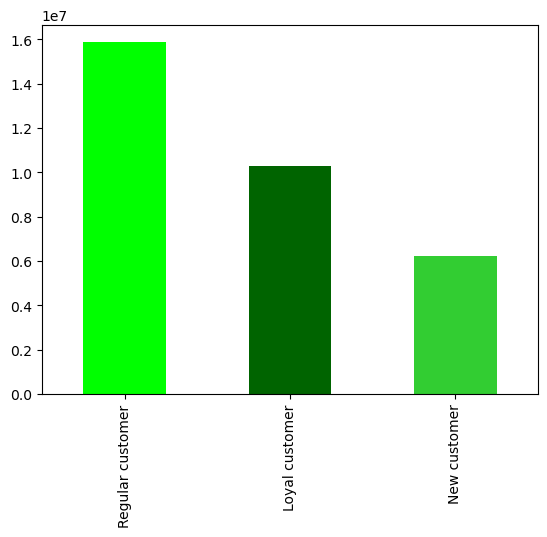

In [5]:
#creating a loyalty flag bar chart
loyalty_bar = cust_ords_prods['loyalty_flag'].value_counts().plot.bar(color = ['lime', 'darkgreen', 'limegreen'])

In [6]:
#exporting visualization
loyalty_bar.figure.savefig((os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_level.png')), bbox_inches = "tight")

# 08. Check to see if there's a difference in expenditure based on hour of the day

In [ ]:
#creating subset for visualization
df_2 = small[['order_hour_of_day', 'prices']]

In [ ]:
#creating line chart of prices by hour
price_by_hour = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')

In [ ]:
#export figure
price_by_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_by_hour_line.png'))

# 09. Create a line chart of children by age

In [ ]:
dependants_by_age = sns.lineplot(data = cust_ords_prods, x = 'Age', y = 'n_dependants')

The number of dependants peaks in the early 20s, probably because of young families, drops in the later 20s before rising in the early 30's when most customers probably have "full" families, the nubmer drops sharply for peope in their 40's, when their kids have probably gone off to college, has a brief rise around 50 before dropping significantly from there through their early 60's.  After that we see a rise again through the 60's as people are taking care of their parents our having grandchildren, then the numbers stay fairly steady through the rest of life. 

In [ ]:
# Export figure
dependants_by_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependants_by_age_line.png'))

# 10. Create a scatter plot of age and income

In [ ]:
# Create scatterplot of Age and Income
Age_Income_Scatter = sns.scatterplot(data = cust_ords_prods, x = 'Age', y = 'income')

There's a sharp rise in max income after the age of 40 and the density of midrange income also increases at this point.  Spending power is greatest between the ages of 40 and ~55, tapers a bit between 65-70 (though never returning to the pre 40 range) and then spikes a bit again from ~75 up.

In [ ]:
# Export Figure
Age_Income_Scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations' 'Age_Income_Scatter.png'))

# 11. Export DF

In [ ]:
#exporting Cust_ords_prods with with prices outliers set to NaN
cust_ords_prods.to_pickle(os.path.join(path,'02 Data', 'Prepared Data' 'Cust_Ords_Prods_Merged.pkl'))